In [1]:
import math
import re
import shutil
import statistics
import subprocess
import sys
import warnings
from collections import defaultdict
from pathlib import Path
from pprint import pprint

import cv2
import hydra
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
from sam2.build_sam import build_sam2
from tqdm import tqdm

if True:
    sys.path.append("..")
    from src.enhancements import high_pass_filter, laplacian_filter, unsharp_mask
    from src.functions import extract_cards

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    device = torch.device("cuda")
else:
    print("No GPU available")
    device = torch.device("cpu")

No GPU available


In [2]:
PROJECT_ROOT = Path("..").resolve()
DATA = PROJECT_ROOT / "data"
OUT = PROJECT_ROOT / "out"

hydra.core.global_hydra.GlobalHydra.instance().clear()
hydra.initialize_config_module("sam2_configs", version_base="1.2")

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# checkpoint = PROJECT_ROOT / "checkpoints" / "sam2.1_hiera_tiny.pt"
# model_cfg = "sam2.1_hiera_t.yaml"
checkpoint = PROJECT_ROOT / "checkpoints" / "sam2_hiera_tiny.pt"
model_cfg = "sam2_hiera_t.yaml"

mask_generator = SAM2AutomaticMaskGenerator(
    build_sam2(model_cfg, checkpoint, device=device),
    points_per_side=16,
    stability_score_thresh=0.9,
    stability_score_offset=0.95,
    min_mask_region_area=5_000,
    # min_mask_region_area=5_000,
    # use_m2m=True,
)

  0%|          | 0/9 [00:00<?, ?it/s]

/Users/f.deladurantaye/Documents/projects/mtg-card-scanner/data/candidates/20210702_142005.jpg
(941, 1269)


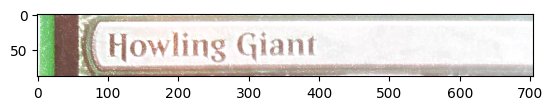

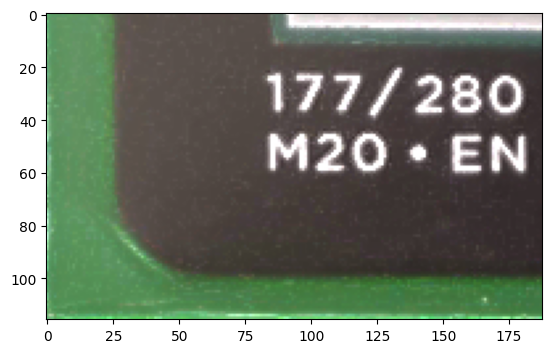

 11%|█         | 1/9 [00:08<01:07,  8.50s/it]

('Howling Giant', '177/280\nM20EN')
/Users/f.deladurantaye/Documents/projects/mtg-card-scanner/data/candidates/20230517_222619.jpg
(997, 1349)


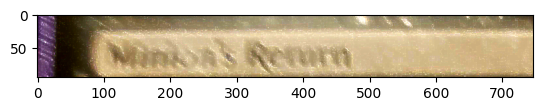

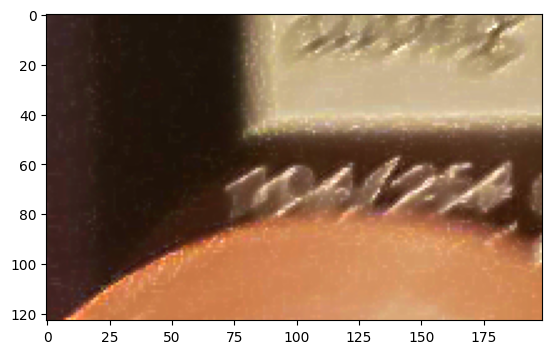

 22%|██▏       | 2/9 [00:17<01:01,  8.85s/it]

('', '')
(1139, 733)
/Users/f.deladurantaye/Documents/projects/mtg-card-scanner/data/candidates/20230621_211622.jpg
(1001, 1419)


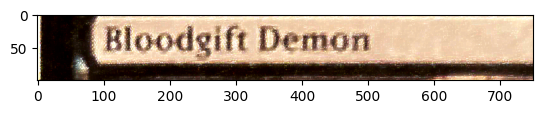

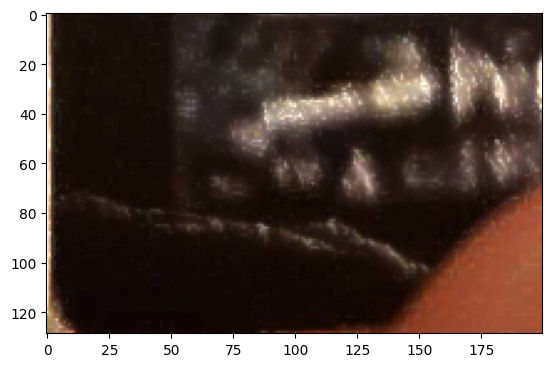

 33%|███▎      | 3/9 [00:26<00:52,  8.73s/it]

('Bloodgift Demon', '')
/Users/f.deladurantaye/Documents/projects/mtg-card-scanner/data/candidates/20230621_212158.jpg


 33%|███▎      | 3/9 [00:31<01:02, 10.41s/it]


KeyboardInterrupt: 

In [4]:
candidates_path = DATA / "candidates"

extracted_cards = {}
for path in tqdm(sorted(candidates_path.iterdir())[1:10]):
# for path in tqdm(sorted(candidates_path.iterdir())[:1]):
    print(path.as_posix())
    outputs = extract_cards(mask_generator, path, out_dir=OUT)
    extracted_cards[path.stem] = outputs

pprint(extracted_cards)

In [5]:
# def show_image(image, title: str, index: int) -> None:
#     plt.subplot(1, 2, index)
#     plt.title(title)
#     plt.axis("off")
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# # Load an image
# image = cv2.imread(OUT / "warped_card.png")

# # Sharpen the image using the different methods
# sharpened_unsharp = unsharp_mask(image)
# sharpened_laplacian = laplacian_filter(image)
# sharpened_high_pass = high_pass_filter(image)
# combined = cv2.add(cv2.add(sharpened_unsharp, sharpened_laplacian), sharpened_high_pass)

# # Display the results
# plt.figure(figsize=(10, 20))
# show_image(image, "Original", 1)
# # show_image(sharpened_unsharp, "Unsharp Mask", 2)
# # show_image(sharpened_laplacian, "Laplacian Filter", 3)
# # show_image(sharpened_high_pass, "High Pass Filter", 4)
# show_image(combined, "Combined", 2)
# plt.show()